In [6]:
%run import_files.ipynb

data_day_ahead, data_physical_flow = import_csv_files()

InMapCode OutMapCode  FlowValue
DateTime                                           
2020-09-01 22:00:00       NO2      DE_LU     0.0000
2020-09-01 23:00:00       NO2      DE_LU     0.0000
2020-09-02 00:00:00       NO2      DE_LU     0.0000
2020-09-02 01:00:00       NO2      DE_LU     0.0000
2020-09-02 02:00:00       NO2      DE_LU     0.0000
...                       ...        ...        ...
2023-12-31 19:00:00       NO2      DE_LU  1348.2700
2023-12-31 20:00:00       NO2      DE_LU  1348.4700
2023-12-31 21:00:00       NO2      DE_LU  1348.5225
2023-12-31 22:00:00       NO2      DE_LU  1350.5975
2023-12-31 23:00:00       NO2      DE_LU  1399.0425

[29186 rows x 3 columns]

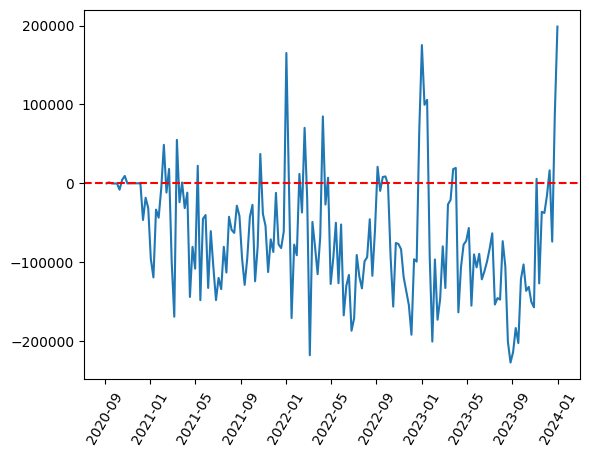

In [59]:
data_physical_flow = data_physical_flow.sort_values('DateTime')

df_import_from_DE = data_physical_flow[data_physical_flow['OutMapCode'].isin(['DE_LU'])]
df_import_from_NO2 = data_physical_flow[data_physical_flow['OutMapCode'].isin(['NO2'])]

df_NO2_to_DE = df_import_from_DE[df_import_from_DE['InMapCode'].isin(['NO2'])]
df_DE_to_NO2 = df_import_from_NO2[df_import_from_NO2['InMapCode'].isin(['DE_LU'])]

df_NO2_to_DE_weekly = df_NO2_to_DE[['FlowValue']].resample('W').sum()
df_DE_to_NO2_weekly = df_DE_to_NO2[['FlowValue']].resample('W').sum()

df_NO2_to_DE_weekly.reset_index(inplace=True)
df_DE_to_NO2_weekly.reset_index(inplace=True)

# Ensure that both DataFrames have the same DateTime index and are aligned
df_combined = pd.merge(df_NO2_to_DE_weekly, df_DE_to_NO2_weekly, on='DateTime', suffixes=('_NO2_to_DE', '_DE_to_NO2'))

# Subtract the TotalFlowValue from df_DE_to_NO2_weekly from df_NO2_to_DE_weekly
df_combined['FlowDifference'] = df_combined['FlowValue_NO2_to_DE'] - df_combined['FlowValue_DE_to_NO2']

plt.plot(df_combined['DateTime'], df_combined['FlowDifference'])
plt.xticks(rotation=60)
plt.axhline(0, ls="--", color="r")

display(df_NO2_to_DE)





